In [31]:
!pip install pandas
import pandas as pd

# Incorporate data
df = pd.read_csv('analise-de-dados-clone.csv', low_memory=False)

In [33]:
# Desativar truncamento de linhas ao imprimir
pd.set_option("display.max_rows", None)

# Agora imprime todos os dtypes de cada coluna
print(df.dtypes)

# (Opcional) restaurar a configuração padrão
pd.reset_option("display.max_rows")


ID do registro.                                                        int64
Nome do negócio                                                       object
Etapa do negócio                                                      object
Data de fechamento                                                    object
Proprietário do negócio                                               object
Valor                                                                float64
Motivo de Perda                                                       object
Sub-motivo de perda do negócio                                        object
Pré-análise de crédito                                                object
Tipo de Imóvel                                                        object
Dados da fonte de tráfego mais recente 1                              object
Dados da fonte de tráfego mais recente 2                              object
Fonte de tráfego mais recente                                         object

In [35]:
# Colunas relevantes
valor_col = 'Valor'
valor_entrada_col = 'Valor de entrada'

# Estatísticas descritivas para 'Valor'
estatisticas_valor = df[valor_col].describe()

# Estatísticas descritivas para 'Valor de entrada'
estatisticas_valor_entrada = df[valor_entrada_col].describe()

# Função para formatar valores em reais
def formatar_reais(valor):
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

# Aplicar formatação e exibir resultados
print("Estatísticas Descritivas - Valor:")
for key, value in estatisticas_valor.items():
    print(f"{key.capitalize()}: {formatar_reais(value)}")

print("\nEstatísticas Descritivas - Valor de Entrada:")
for key, value in estatisticas_valor_entrada.items():
    print(f"{key.capitalize()}: {formatar_reais(value)}")

# Salvar os resultados formatados em um arquivo Excel (opcional)
estatisticas_formatadas = pd.DataFrame({
    "Estatísticas Valor": estatisticas_valor.map(formatar_reais),
    "Estatísticas Valor de Entrada": estatisticas_valor_entrada.map(formatar_reais)
})

Estatísticas Descritivas - Valor:
Count: R$ 23.663,00
Mean: R$ 31.208.019,68
Std: R$ 1.923.772.352,07
Min: R$ 0,00
25%: R$ 250.000,00
50%: R$ 350.000,00
75%: R$ 500.000,00
Max: R$ 180.000.250.000,00

Estatísticas Descritivas - Valor de Entrada:
Count: R$ 8.691,00
Mean: R$ 165.950,12
Std: R$ 3.206.422,15
Min: R$ 0,00
25%: R$ 10.000,00
50%: R$ 20.000,00
75%: R$ 50.000,00
Max: R$ 150.000.000,00


In [7]:
# Filtrar e contar valores de entrada maiores que 500 mil
entrada_maior_500k = df[df[valor_entrada_col] > 500000].shape[0]

# Filtrar e contar valores de imóvel maiores que 5 milhões
imovel_maior_5M = df[df[valor_col] > 5000000].shape[0]

# Exibir resultados
print(f"Quantidade de valores de entrada maiores que R$ 500.000: {entrada_maior_500k}")
print(f"Quantidade de valores de imóvel maiores que R$ 5.000.000: {imovel_maior_5M}")


Quantidade de valores de entrada maiores que R$ 500.000: 77
Quantidade de valores de imóvel maiores que R$ 5.000.000: 368


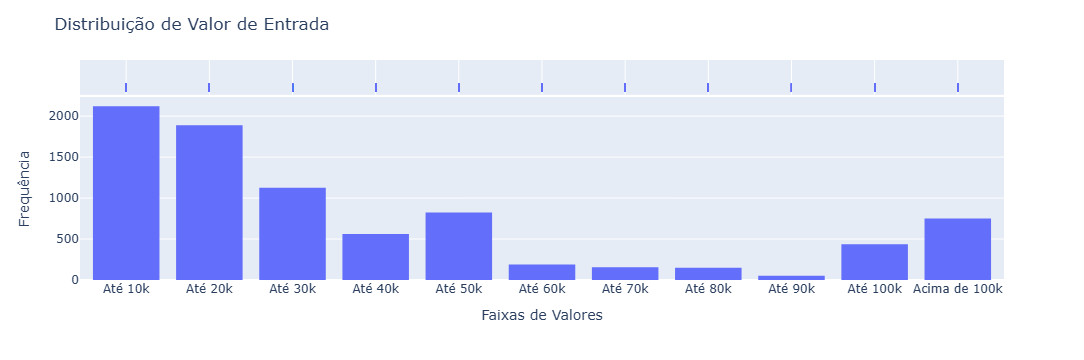

In [53]:
import plotly.express as px
import pandas as pd

# Filtrar e criar um DataFrame apenas com a coluna "Valor de entrada"
valor_entrada_col = 'Valor de entrada'
df_valor_entrada = df[[valor_entrada_col]].copy()

# Remover valores nulos e valores menores ou iguais a 0
df_valor_entrada = df_valor_entrada.dropna(subset=[valor_entrada_col])
df_valor_entrada = df_valor_entrada[df_valor_entrada[valor_entrada_col] > 0]

# Adicionar uma coluna para identificar explicitamente todas as faixas
def categorizar_valor(x):
    if x <= 10000:
        return 'Até 10k'
    elif x <= 20000:
        return 'Até 20k'
    elif x <= 30000:
        return 'Até 30k'
    elif x <= 40000:
        return 'Até 40k'
    elif x <= 50000:
        return 'Até 50k'
    elif x <= 60000:
        return 'Até 60k'
    elif x <= 70000:
        return 'Até 70k'
    elif x <= 80000:
        return 'Até 80k'
    elif x <= 90000:
        return 'Até 90k'
    elif x <= 100000:
        return 'Até 100k'
    else:
        return 'Acima de 100k'

df_valor_entrada['Faixa de Valor'] = df_valor_entrada[valor_entrada_col].apply(categorizar_valor)

# Determinar a ordem desejada explicitamente
ordem_categorias = [
    'Até 10k', 'Até 20k', 'Até 30k', 'Até 40k', 'Até 50k',
    'Até 60k', 'Até 70k', 'Até 80k', 'Até 90k', 'Até 100k', 'Acima de 100k'
]

# Criar o histograma com os valores categorizados
fig = px.histogram(df_valor_entrada, x='Faixa de Valor', marginal='rug',
                   category_orders={'Faixa de Valor': ordem_categorias},
                   hover_data=df_valor_entrada.columns)

fig.update_layout(
    title="Distribuição de Valor de Entrada",
    xaxis_title="Faixas de Valores",
    yaxis_title="Frequência",
    bargap=0.2
)

fig.show()


In [83]:
import pandas as pd

# Carregar o DataFrame existente com low_memory=False para evitar avisos de tipos mistos
df_clone = pd.read_csv("analise-de-dados-clone.csv", low_memory=False)

# Carregar a nova planilha e ajustar tipo
df_valor_preenchido = pd.read_excel("Valor de entrada preenchido por cliente.xlsx")
df_valor_preenchido['Record ID'] = df_valor_preenchido['Record ID'].astype('int64')

# Realizar o merge usando um left join
df_merged = pd.merge(
    df_clone,
    df_valor_preenchido,
    left_on='ID do registro.',  # Nome correto com ponto no final
    right_on='Record ID',
    how='left'  # Left join para manter todos os registros de df_clone
)

# Renomear as colunas conforme solicitado
df_merged.rename(
    columns={
        'Valor de entrada Current Value': 'Valor da Entrada Input Cliente',
        'Valor': 'Valor do Imóvel'
    },
    inplace=True
)

# Criar um DataFrame apenas com as colunas desejadas
df_final = df_merged[['Valor de entrada', 'Valor da Entrada Input Cliente', 'Valor do Imóvel']]

# Configuração para exibir todas as linhas e colunas
pd.set_option('display.max_rows', None)  # Mostra todas as linhas
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.width', None)  # Ajusta a largura para caber todas as colunas
pd.set_option('display.max_colwidth', None)  # Mostra todo o conteúdo das células

# Exibir o DataFrame completo
print(df_final)

       Valor de entrada  Valor da Entrada Input Cliente    Valor do Imóvel
0              7,000.00                        7,000.00         200,000.00
1            100,000.00                      100,000.00         800,000.00
2             80,000.00                       80,000.00         480,000.00
3                   NaN                             NaN         500,000.00
4                   NaN                             NaN                NaN
5             20,000.00                       20,000.00         425,000.00
6              5,000.00                        5,000.00         300,000.00
7                  0.00                            0.00         200,000.00
8                   NaN                             NaN         700,000.00
9                  0.00                            0.00         180,000.00
10            10,000.00                       10,000.00         200,000.00
11                  NaN                             NaN                NaN
12            15,000.00  

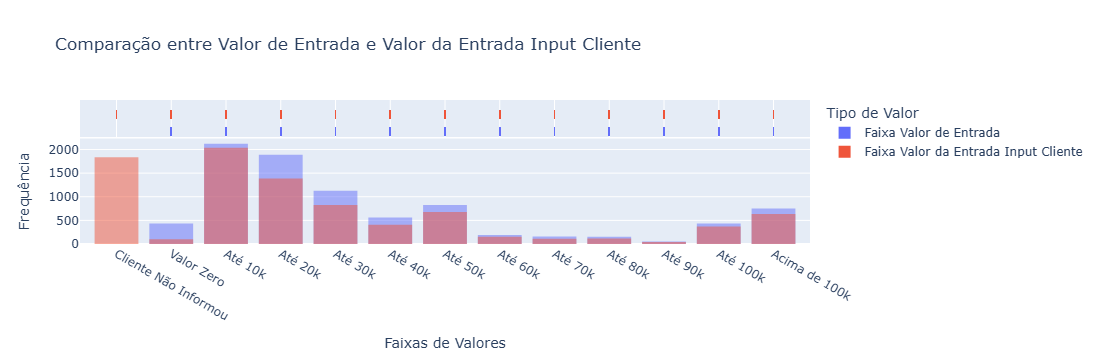

In [93]:
import plotly.express as px
import pandas as pd

# Criar um DataFrame com as duas colunas de valores
df_comparativo = df_final[['Valor de entrada', 'Valor da Entrada Input Cliente']].copy()

# Filtrar registros onde 'Valor de entrada' não é NaN
df_comparativo = df_comparativo[~df_comparativo['Valor de entrada'].isna()]

# Substituir 'NaN' em 'Valor da Entrada Input Cliente' por -1 onde 'Valor de entrada' existe
df_comparativo['Valor da Entrada Input Cliente'] = df_comparativo['Valor da Entrada Input Cliente'].fillna(-1)

# Função para categorizar os valores em faixas
def categorizar_valor(x):
    if x == -1:  # Valores ajustados para -1
        return 'Cliente Não Informou'
    elif x == 0:  # Valores explicitamente iguais a 0
        return 'Valor Zero'
    elif x <= 10000:
        return 'Até 10k'
    elif x <= 20000:
        return 'Até 20k'
    elif x <= 30000:
        return 'Até 30k'
    elif x <= 40000:
        return 'Até 40k'
    elif x <= 50000:
        return 'Até 50k'
    elif x <= 60000:
        return 'Até 60k'
    elif x <= 70000:
        return 'Até 70k'
    elif x <= 80000:
        return 'Até 80k'
    elif x <= 90000:
        return 'Até 90k'
    elif x <= 100000:
        return 'Até 100k'
    else:
        return 'Acima de 100k'

# Garantir que valores numéricos sejam corretamente tratados
df_comparativo['Valor de entrada'] = pd.to_numeric(df_comparativo['Valor de entrada'], errors='coerce')
df_comparativo['Valor da Entrada Input Cliente'] = pd.to_numeric(df_comparativo['Valor da Entrada Input Cliente'], errors='coerce')

# Categorizar ambas as colunas
df_comparativo['Faixa Valor de Entrada'] = df_comparativo['Valor de entrada'].apply(categorizar_valor)
df_comparativo['Faixa Valor da Entrada Input Cliente'] = df_comparativo['Valor da Entrada Input Cliente'].apply(categorizar_valor)

# Combinar as colunas para criar um DataFrame categorizado
df_comparativo_melted = df_comparativo.melt(
    value_vars=['Faixa Valor de Entrada', 'Faixa Valor da Entrada Input Cliente'], 
    var_name='Tipo de Valor', 
    value_name='Faixa de Valor'
)

# Ordem explícita das categorias
ordem_categorias = [
    'Cliente Não Informou', 'Valor Zero', 'Até 10k', 'Até 20k', 'Até 30k', 
    'Até 40k', 'Até 50k', 'Até 60k', 'Até 70k', 'Até 80k', 
    'Até 90k', 'Até 100k', 'Acima de 100k'
]

# Criar o histograma
fig = px.histogram(
    df_comparativo_melted, 
    x='Faixa de Valor', 
    color='Tipo de Valor', 
    barmode='overlay',  # Alterar para 'group' se quiser barras lado a lado
    category_orders={'Faixa de Valor': ordem_categorias},
    marginal="rug",
    title="Comparação entre Valor de Entrada e Valor da Entrada Input Cliente"
)

fig.update_layout(
    xaxis_title="Faixas de Valores",
    yaxis_title="Frequência",
    bargap=0.2
)

fig.show()


In [91]:
import pandas as pd

# Calcular a estatística descritiva de cada conjunto
stats_valor_entrada = df_final['Valor de entrada'].describe()
stats_valor_input_cliente = df_final['Valor da Entrada Input Cliente'].describe()

# Combinar as estatísticas em uma tabela comparativa
df_stats_comparativa = pd.DataFrame({
    'Estatística': stats_valor_entrada.index,
    'Valor de Entrada': stats_valor_entrada.values,
    'Valor da Entrada Input Cliente': stats_valor_input_cliente.values
})

# Configurar a exibição para não usar notação científica
pd.options.display.float_format = '{:,.2f}'.format

# Exibir a tabela comparativa
print(df_stats_comparativa)


  Estatística  Valor de Entrada  Valor da Entrada Input Cliente
0       count          8,691.00                        6,858.00
1        mean        165,950.12                      242,347.01
2         std      3,206,422.15                    4,128,398.70
3         min              0.00                            0.00
4         25%         10,000.00                       10,000.00
5         50%         20,000.00                       20,000.00
6         75%         50,000.00                       50,000.00
7         max    150,000,000.00                  150,000,000.00


In [73]:
import pandas as pd

# Criar uma cópia explícita do DataFrame para evitar problemas de referência
df_final_copy = df_final.copy()

# Criar uma coluna booleana para identificar se os valores são iguais
df_final_copy['Valores Iguais'] = df_final_copy['Valor de entrada'] == df_final_copy['Valor da Entrada Input Cliente']

# Contar valores iguais e diferentes
iguais = df_final_copy['Valores Iguais'].sum()  # Contar quantos são True (iguais)
diferentes = len(df_final_copy) - iguais  # Contar quantos são diferentes

# Criar a tabela comparativa
df_comparacao = pd.DataFrame({
    'Categoria': ['Valores Iguais', 'Valores Diferentes'],
    'Quantidade': [iguais, diferentes]
})

# Exibir a tabela comparativa
print(df_comparacao)


            Categoria  Quantidade
0      Valores Iguais        6680
1  Valores Diferentes         178
